In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# 1. Membaca dataset
df = pd.read_csv(r"C:\Users\OPTION\Downloads\Python DA\[BELUM] Projects 11_Business Analytics Of Walmart Sales Dashboard By Alfin Bahru Rahmika Umar\Walmart_Sales.csv")

In [24]:
# Menampilkan informasi dasar
print("Dimensi awal dataset:", df.shape)

Dimensi awal dataset: (6435, 8)


In [25]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [26]:
# Mengonversi kolom Date menjadi tipe datetime
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\OPTION\AppData\Local\Temp\ipykernel_3188\4987240.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [27]:
print("Dataset Awal:")
print(df.info())
print("\nJumlah duplikat:", df.duplicated().sum())
print("Missing values per kolom:\n", df.isnull().sum())

Dataset Awal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB
None

Jumlah duplikat: 0
Missing values per kolom:
 Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [28]:
# Salin dataset awal untuk perbandingan
df_original = df.copy()

In [29]:
# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Mendeteksi outlier untuk kolom-kolom numerik
numeric_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
outliers = {}
for col in numeric_cols:
    outliers[col] = detect_outliers(df, col)
    print(f"\nOutlier pada kolom {col}: {outliers[col].shape[0]} data")


Outlier pada kolom Weekly_Sales: 34 data

Outlier pada kolom Temperature: 3 data

Outlier pada kolom Fuel_Price: 0 data

Outlier pada kolom CPI: 0 data

Outlier pada kolom Unemployment: 481 data


In [30]:
# Data Cleaning:
# 1. Menghapus duplikat
df_clean = df.drop_duplicates()

# 2. Menghapus missing values (jika ada)
df_clean = df_clean.dropna()

# 3. Menghapus outlier untuk setiap kolom numerik
for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

print("\nDataset setelah cleaning:")
print(df_clean.info())


Dataset setelah cleaning:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5917 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         5917 non-null   int64         
 1   Date          5917 non-null   datetime64[ns]
 2   Weekly_Sales  5917 non-null   float64       
 3   Holiday_Flag  5917 non-null   int64         
 4   Temperature   5917 non-null   float64       
 5   Fuel_Price    5917 non-null   float64       
 6   CPI           5917 non-null   float64       
 7   Unemployment  5917 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 416.0 KB
None


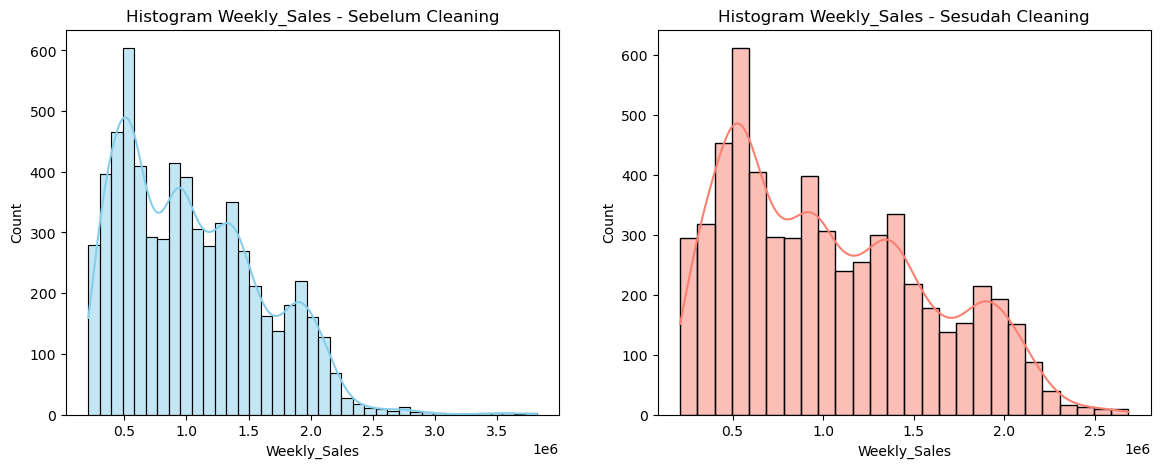

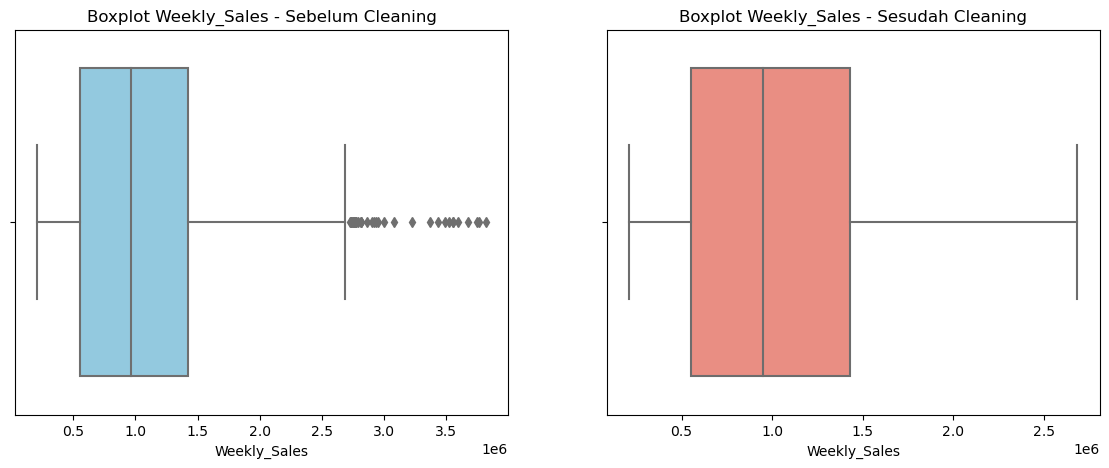

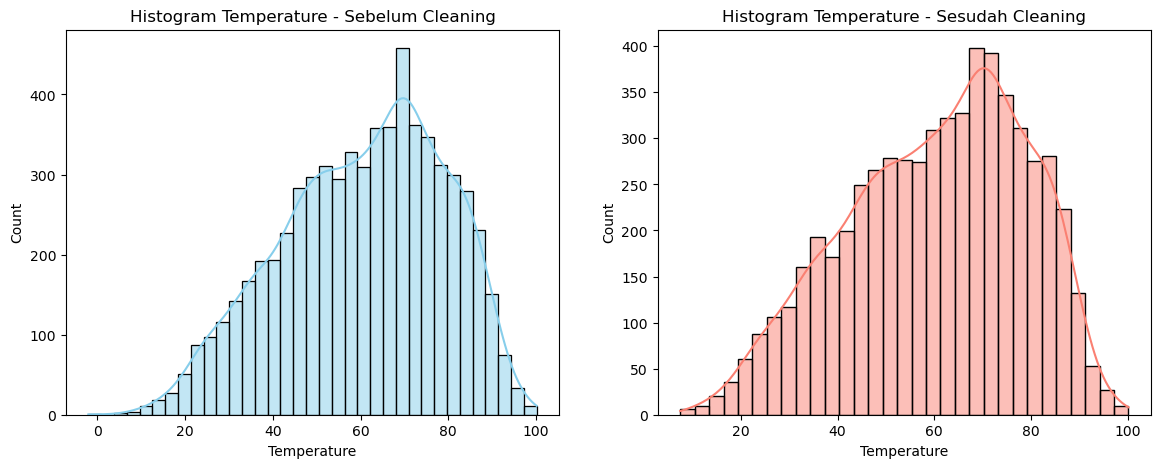

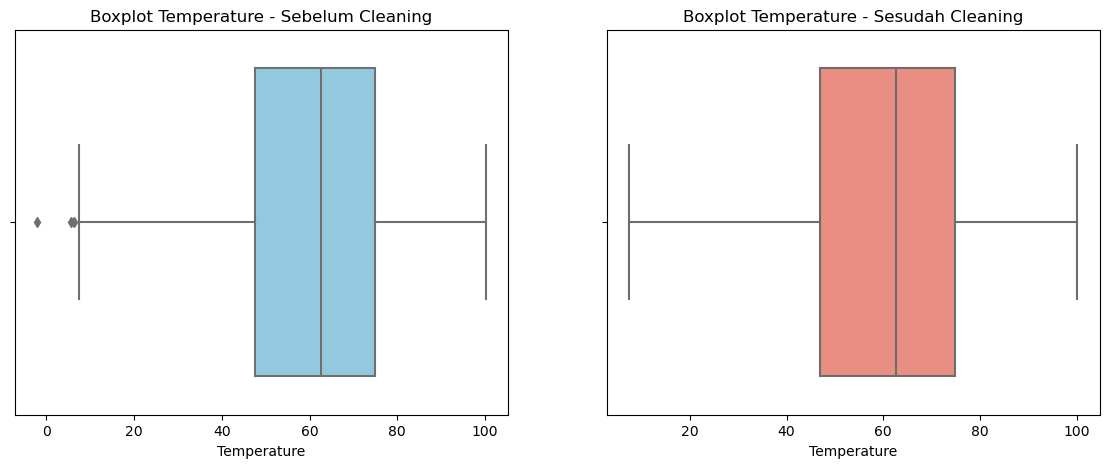

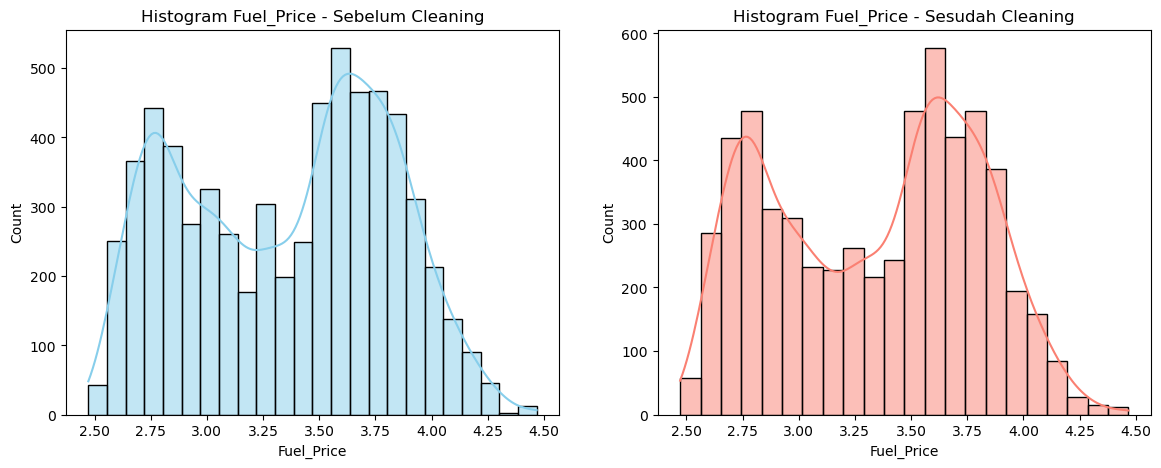

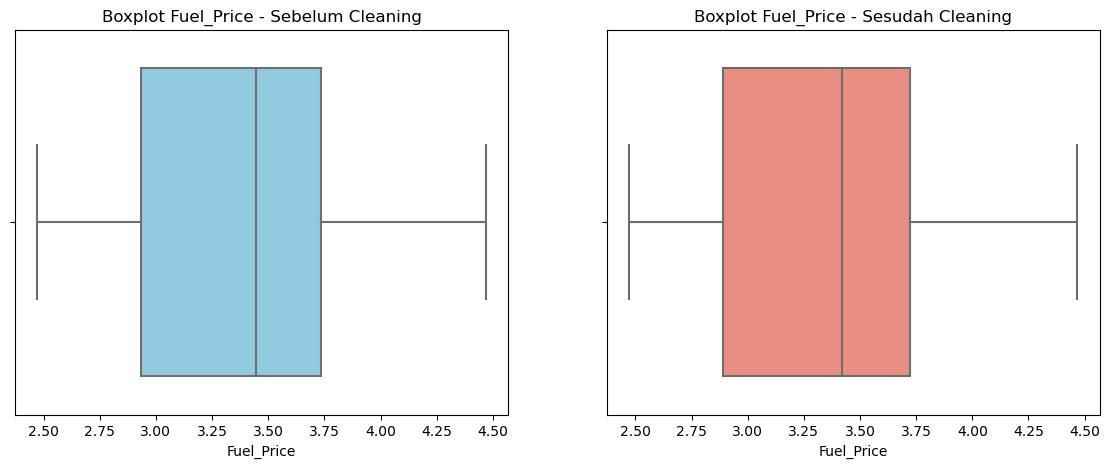

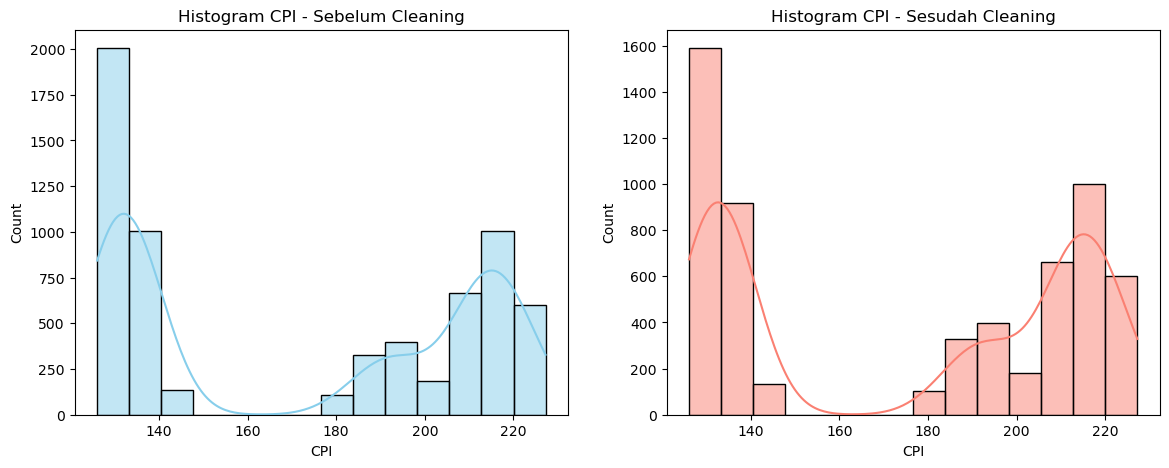

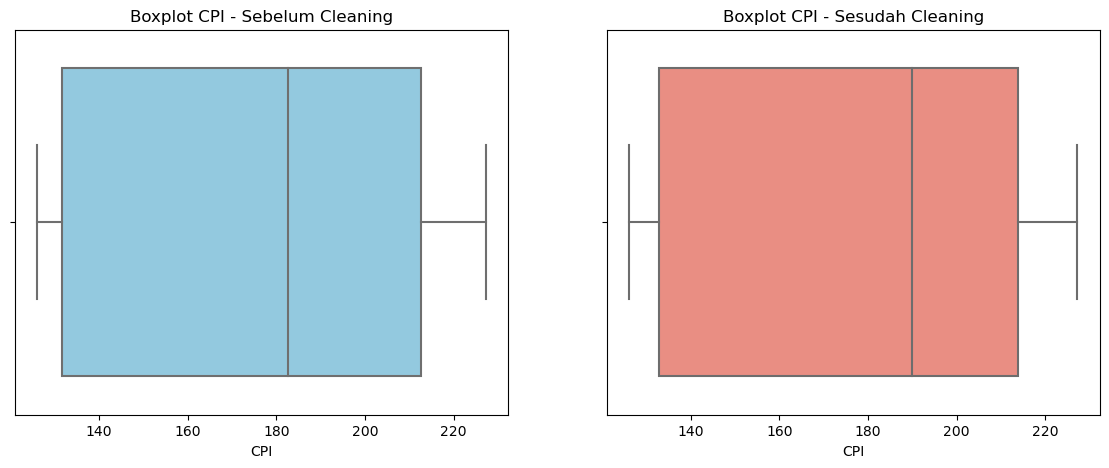

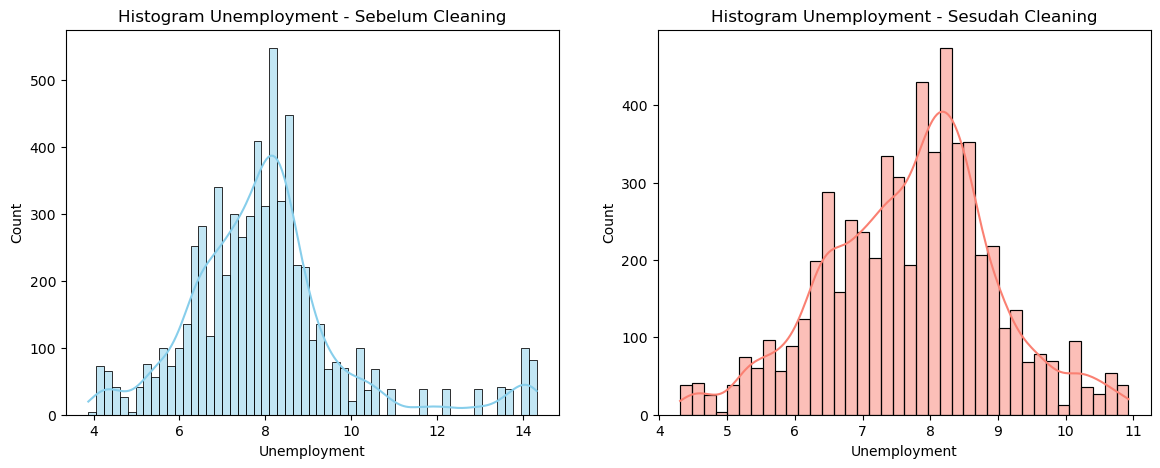

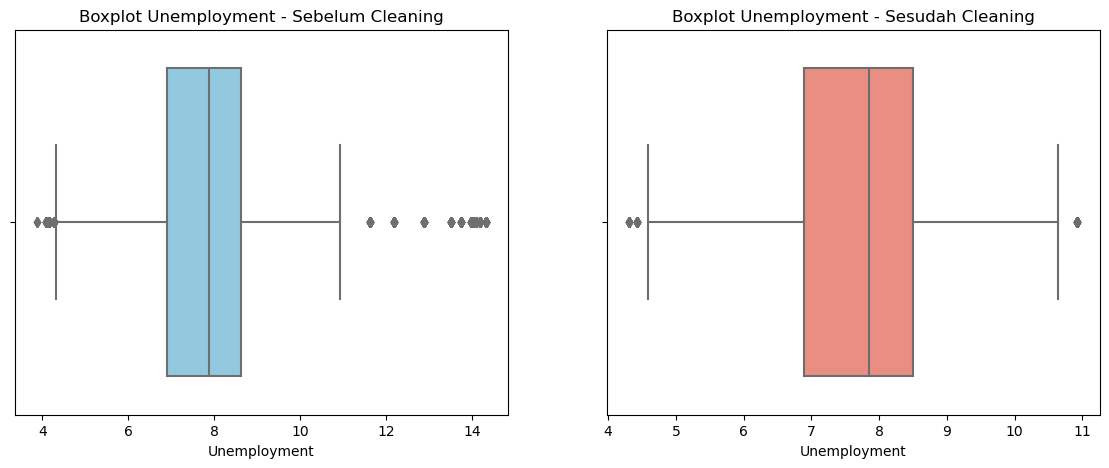

In [31]:
# Membuat histogram dan box plot sebelum dan sesudah cleaning
def plot_comparison(original, cleaned, col):
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(original[col], kde=True, color='skyblue')
    plt.title(f'Histogram {col} - Sebelum Cleaning')
    
    plt.subplot(1, 2, 2)
    sns.histplot(cleaned[col], kde=True, color='salmon')
    plt.title(f'Histogram {col} - Sesudah Cleaning')
    
    plt.show()
    
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x=original[col], color='skyblue')
    plt.title(f'Boxplot {col} - Sebelum Cleaning')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=cleaned[col], color='salmon')
    plt.title(f'Boxplot {col} - Sesudah Cleaning')
    
    plt.show()

for col in numeric_cols:
    plot_comparison(df_original, df_clean, col)

In [32]:
# Simpan dataset yang sudah dibersihkan
df_clean.to_csv('Walmart_Sales-CLEANED.csv', index=False)

In [33]:
# Menghitung metrik
total_stores = df_clean['Store'].nunique()
avg_unemployment = df_clean['Unemployment'].mean()
total_sales = df_clean['Weekly_Sales'].sum()
highest_full_price = df_clean['Fuel_Price'].max()
lowest_full_price = df_clean['Fuel_Price'].min()
avg_cpi = df_clean['CPI'].mean()

print("Total Stores:", total_stores)
print("Average Unemployment Rate:", avg_unemployment)
print("Total Sales:", total_sales)
print("Highest Full Price (Fuel_Price):", highest_full_price)
print("Lowest Full Price (Fuel_Price):", lowest_full_price)
print("Average CPI:", avg_cpi)

Total Stores: 45
Average Unemployment Rate: 7.722304884231874
Total Sales: 6149615227.91
Highest Full Price (Fuel_Price): 4.468
Lowest Full Price (Fuel_Price): 2.472
Average CPI: 175.0231480958932


In [34]:
# Menambahkan kolom Year-Month untuk keperluan line chart
df_clean['Year_Month'] = df_clean['Date'].dt.to_period('M').astype(str)

# Agregasi data untuk line chart
unemp_per_month = df_clean.groupby('Year_Month')['Unemployment'].mean().reset_index()
sales_per_month = df_clean.groupby('Year_Month')['Weekly_Sales'].sum().reset_index()

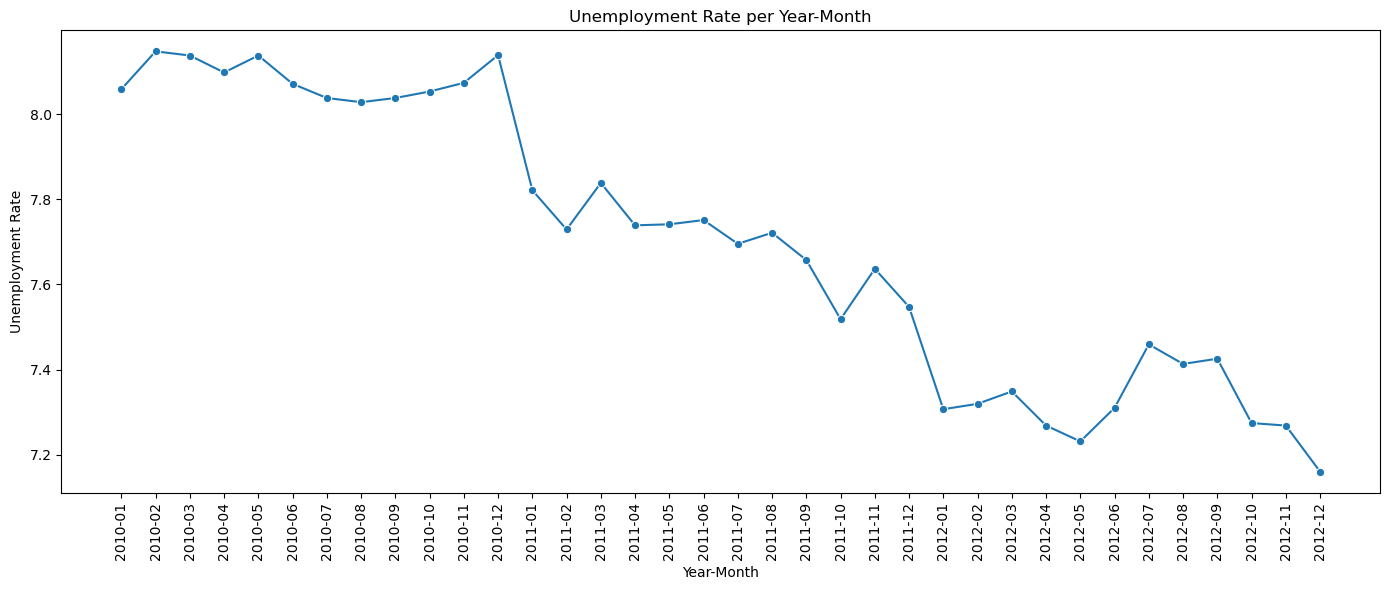

In [37]:
# Plot Line Chart Unemployment Rate per Year-Month
plt.figure(figsize=(14,6))
sns.lineplot(data=unemp_per_month, x='Year_Month', y='Unemployment', marker='o')
plt.xticks(rotation=90)
plt.title('Unemployment Rate per Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Unemployment Rate')
plt.tight_layout()
plt.show()

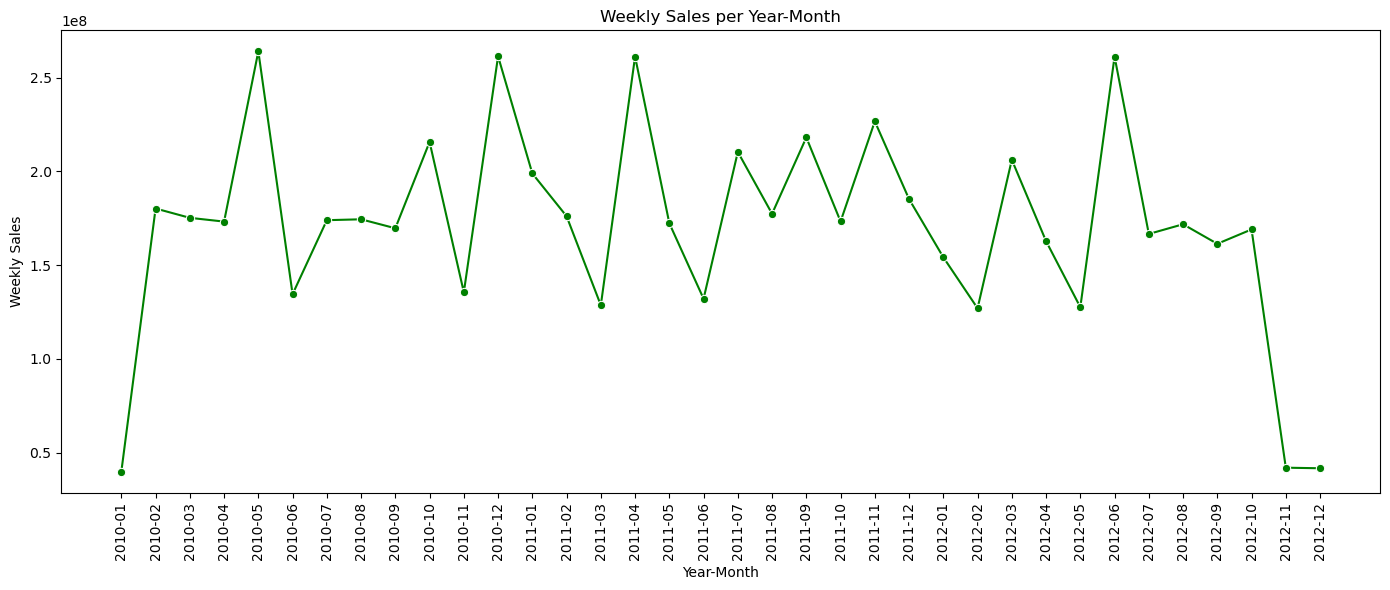

In [38]:
# Plot Line Chart Sales per Year-Month
plt.figure(figsize=(14,6))
sns.lineplot(data=sales_per_month, x='Year_Month', y='Weekly_Sales', marker='o', color='green')
plt.xticks(rotation=90)
plt.title('Weekly Sales per Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Weekly Sales')
plt.tight_layout()
plt.show()

In [ ]:
# import dash
# from dash import dcc, html
# from dash.dependencies import Input, Output
# import plotly.express as px

# # Membuat grafik Plotly
# fig_unemp = px.line(unemp_per_month, x='Year_Month', y='Unemployment',
#                     title='Unemployment Rate per Year-Month')
# fig_sales = px.line(sales_per_month, x='Year_Month', y='Weekly_Sales',
#                     title='Weekly Sales per Year-Month')

# # Inisialisasi aplikasi Dash
# app = dash.Dash(__name__)

# app.layout = html.Div(children=[
#     html.H1(children='Dashboard Walmart Sales'),

#     html.Div([
#         html.H3(f"Total Stores: {total_stores}"),
#         html.H3(f"Average Unemployment Rate: {avg_unemployment:.2f}"),
#         html.H3(f"Total Sales: {total_sales:,.2f}"),
#         html.H3(f"Highest Full Price (Fuel_Price): {highest_full_price}"),
#         html.H3(f"Lowest Full Price (Fuel_Price): {lowest_full_price}"),
#         html.H3(f"Average CPI: {avg_cpi:.2f}")
#     ], style={'margin': '20px'}),

#     dcc.Graph(
#         id='graph-unemp',
#         figure=fig_unemp
#     ),

#     dcc.Graph(
#         id='graph-sales',
#         figure=fig_sales
#     )
# ])

# if __name__ == '__main__':
#     app.run_server(debug=True)
